In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Major Imports

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses

# System libraries
from pathlib import Path
import os.path

# Metrics
import itertools

Notebook Color Scheme: 


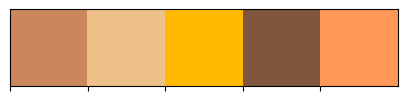

In [3]:
#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'

my_colors = ["#cb865b", "#efc088", "#ffba01", "#7e573d", "#ff9756"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

In [4]:
train_data = 'drive/MyDrive/Colab Notebooks/archive (15)/train'
test_data = 'drive/MyDrive/Colab Notebooks/archive (15)/test'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./ 255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_images = train_datagen.flow_from_directory(directory = train_data, batch_size = 32, target_size = (224,224), class_mode = "categorical", shuffle = False)
test_images = test_datagen.flow_from_directory(directory = test_data, batch_size = 32, target_size = (224,224), class_mode = "categorical")

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [7]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

58889256/58889256 [==============================] - 1s 0us/step


In [8]:
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(128, activation='relu'))
#vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(2, activation='softmax'))

vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 15,043,266
Trainable params: 328,578
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
vgg_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = vgg_model.fit(train_images, epochs = 20, steps_per_epoch = len(train_images),
                    validation_data = test_images, validation_steps = int(0.25 * len(test_images)))

Epoch 1/20
22/22 [==============================] - 524s 23s/step - loss: 0.8720 - accuracy: 0.4074 - val_loss: 0.6824 - val_accuracy: 0.7188
Epoch 2/20
22/22 [==============================] - 504s 23s/step - loss: 0.7367 - accuracy: 0.4721 - val_loss: 0.7212 - val_accuracy: 0.3750
Epoch 3/20
22/22 [==============================] - 482s 22s/step - loss: 0.7098 - accuracy: 0.5029 - val_loss: 0.6732 - val_accuracy: 0.5625
Epoch 4/20
22/22 [==============================] - 463s 21s/step - loss: 0.7051 - accuracy: 0.5074 - val_loss: 0.6734 - val_accuracy: 0.5938
Epoch 5/20
22/22 [==============================] - 482s 22s/step - loss: 0.6925 - accuracy: 0.5132 - val_loss: 0.6609 - val_accuracy: 0.5625
Epoch 6/20
22/22 [==============================] - 484s 22s/step - loss: 0.6951 - accuracy: 0.4882 - val_loss: 0.6574 - val_accuracy: 0.6875
Epoch 7/20
22/22 [==============================] - 460s 21s/step - loss: 0.6910 - accuracy: 0.5250 - val_loss: 0.6687 - val_accuracy: 0.6562
Epoch 

In [10]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

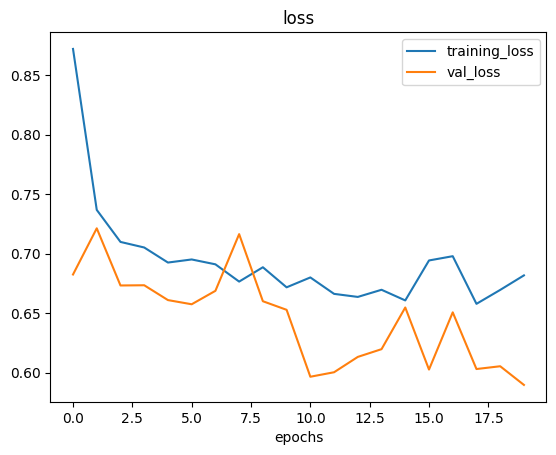

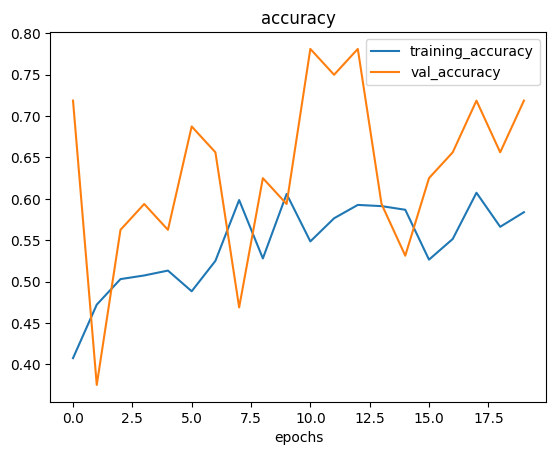

In [11]:
plot_loss_curves(history)

In [13]:
vgg_model.evaluate(test_images)

4/4 [==============================] - 81s 19s/step - loss: 0.6137 - accuracy: 0.7000


[0.6136799454689026, 0.699999988079071]

In [15]:
vgg_model.save('model9.h5')

In [18]:
## Testing 1

img= image.load_img('/content/drive/MyDrive/Colab Notebooks/archive (15)/test/children/0.jpg',target_size=(224, 224))   #read image
X= image.img_to_array(img)  # converting the image into array

X= np.expand_dims(X,axis=0)
pred = np.argmax(vgg_model.predict(X)) # predicting the higher probability index
op=['adults','children'] # creating a list
op[pred] # List indexing with output

1/1 [==============================] - 1s 842ms/step


'children'

In [23]:
## Testing 2

img= image.load_img('/content/drive/MyDrive/Colab Notebooks/archive (15)/test/adults/9.jpg',target_size=(224, 224))   #read image
X= image.img_to_array(img)  # converting the image into array

X= np.expand_dims(X,axis=0)
pred = np.argmax(vgg_model.predict(X)) # predicting the higher probability index
op=['adults','children'] # creating a list
op[pred] # List indexing with output

1/1 [==============================] - 1s 761ms/step


'adults'